Analysis of Video Games Sales as our Final Project for the Course Data Analysis- Zero to pandas which is offered by Jovian. 



In [ ]:
!pip install jovian --upgrade -q
import jovian
jovian.set_project('vediogamesales-1')
jovian.set_colab_id('1blm3jXz_5jEd8LwEHjtlURDObkcGnP_B')

     |████████████████████████████████| 68 kB 2.9 MB/s 


Data Analysis of Vedio Games Sales

DataSet is of vedio games sales which I have downloaded from Kaggle using opendatasets. I'll be using OS, Numpy, Pandas, Matplotlib, Seaborn library in this project to analyse the dataset by visualizing and performing computation operations.

We are download the dataset from kaggle using opendatasets module .

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/kedokedokedo/vgsales' 

Here, We are Pasting the URL of our dataset by the varaible name dataset_url.

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harshitpandey88
Your Kaggle Key: ··········


100%|██████████| 356k/356k [00:00<00:00, 65.5MB/s]

Now, here we have downloaded the dataset by importing a library 'opendatasets', which has function od.download(). 

The dataset has been downloaded and extracted.

In [ ]:
data_dir = './vgsales'

In [ ]:
import os
os.listdir(data_dir)

['vgsales.csv']

Now, we will import our OS module to check whether the specified path is an existing directory or not.

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "zerotopandas-course-project-vediogamesales" 

We will save our project with the name of the dataset. 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

importing the jovian module to the collab sheet to connect to our jovian account.

In [ ]:
jovian.commit(project= 'vediogamesales')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pandeyharshit268/vediogamesales


'https://jovian.ai/pandeyharshit268/vediogamesales'

Now, we have successfully saved our project to the jovian account using the command jovian.commit(project_name)
:

Hence, the dataset is containing info about the sales of vedio games in different genre , publisher of vedio game, platform the game will support.



Let's first load the dataset into the dataframe using pandas.

In [ ]:
from google.colab import files

files.upload()

Now, here we have uploaded our dataset to the collab sheet.

In [ ]:
import pandas as pd
vg_sales_df = pd.read_csv('vgsales.csv')
vg_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Now, here we will import the pandas module to read the dataset(csv file) using pd.read_csv command in the pandas module.

Now, here we have came to know our dataset has been loaded and it contains 16598 row and 11 columns.

In [ ]:
vg_sales_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Now, we want to know the columns name of the dataset which we have uploaded. So, get it know from the above code. 

In [ ]:
select_columns = ['Name' , 'Platform' , 'Year' , 'Genre' , 'Publisher' , 'Global_Sales'] #we have selected few columns from the dataset, now let us check the Number of columns.

Now, let us select some of the columns from the dataset.

In [ ]:
len(select_columns)

6

It's clear that 6 columns has been selected

Now, Let us extract the data of these selected columns from the existing dataset.

In [ ]:
vgs_df = vg_sales_df[select_columns].copy()
vgs_df

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.01


Now, let us view some basic info about the extracted dataframe.

In [ ]:
vgs_df.shape

(16598, 6)

In [ ]:
vgs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   Global_Sales  16598 non-null  float64
dtypes: float64(2), object(4)
memory usage: 778.2+ KB


In [ ]:
vgs_df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

let us view some basic statistics about the numeric columns.

In [ ]:
vgs_df.describe()

,Year,Global_Sales
count,16327.000000,16598.000000
mean,2006.406443,0.537441
std,5.828981,1.555028
min,1980.000000,0.010000
25%,2003.000000,0.060000
50%,2007.000000,0.170000
75%,2010.000000,0.470000
max,2020.000000,82.740000


Now let us add a column in vgs_df "Name_with_genre" which shows the Name of vedio game with Genre.

In [ ]:
vgs_df['Name_with_genre'] = vgs_df.Name  +  vgs_df.Genre
vgs_df

,Name,Platform,Year,Genre,Publisher,Global_Sales,Name_with_genre
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,Wii SportsSports
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,Super Mario Bros.Platform
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82,Mario Kart WiiRacing
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,Wii Sports ResortSports
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37,Pokemon Red/Pokemon BlueRole-Playing
...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,Woody Woodpecker in Crazy Castle 5Platform
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,Men in Black II: Alien EscapeShooter
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.01,SCORE International Baja 1000: The Official Ga...
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.01,Know How 2Puzzle


Now let us make a dataframe that counts the Number of Vedio Games in each Genre.


In [ ]:
genre_counts_df = vgs_df.groupby('Genre')['Name'].count()
genre_counts_df


Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Name, dtype: int64

Now let us make a dataframe that counts the Number of games each Publisher launches

In [ ]:
vgs_counts_df = vgs_df.groupby('Platform')['Name'].count()
vgs_counts_df

Platform
2600     133
3DO        3
3DS      509
DC        52
DS      2163
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       960
PCFX       1
PS      1196
PS2     2161
PS3     1329
PS4      336
PSP     1213
PSV      413
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1325
WiiU     143
X360    1265
XB       824
XOne     213
Name: Name, dtype: int64

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pandeyharshit268/vediogamesales


'https://jovian.ai/pandeyharshit268/vediogamesales'

Now, we have successfully saved our project to the jovian account using the command jovian.commit(project_name)


Here we'll visualize our dataset my ploting graphs(pie charts, graph b/w two columns) for the datas, by using library such as seaborn , matplotlib.pyplot.

Let's begin by importing`matplotlib.pyplot` and `seaborn` to visualize the sales of video games by different aspects.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Now, here we will identify the Vediogames which has highest number of sales. by (value_counts) 

In [ ]:
top_vediogames = vgs_df.Name.value_counts().head(10)
top_vediogames

Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
Cars                            8
FIFA Soccer 13                  8
LEGO The Hobbit                 8
Monopoly                        8
LEGO Jurassic World             8
Name: Name, dtype: int64

Now, Let us show the Top 10 Vedio games with its sales in the form of graph.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


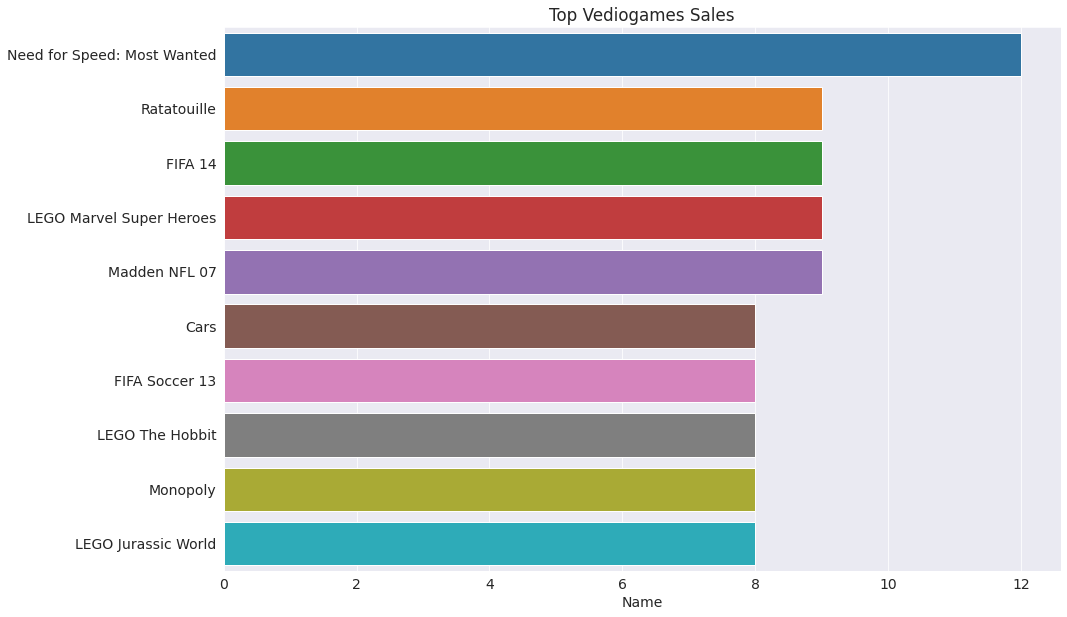

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 0)
plt.title("Top Vediogames Sales")
sns.barplot(top_vediogames, top_vediogames.index)

We have successfully ploted the graph of the top videogames with it's sales.
So, we have came to know that the Video Game named "Need for speed most wanted" has the highest number of sales, which is shown in the above plotted graph.

Here we'll plot the histographic graph b/w Genre With its sales

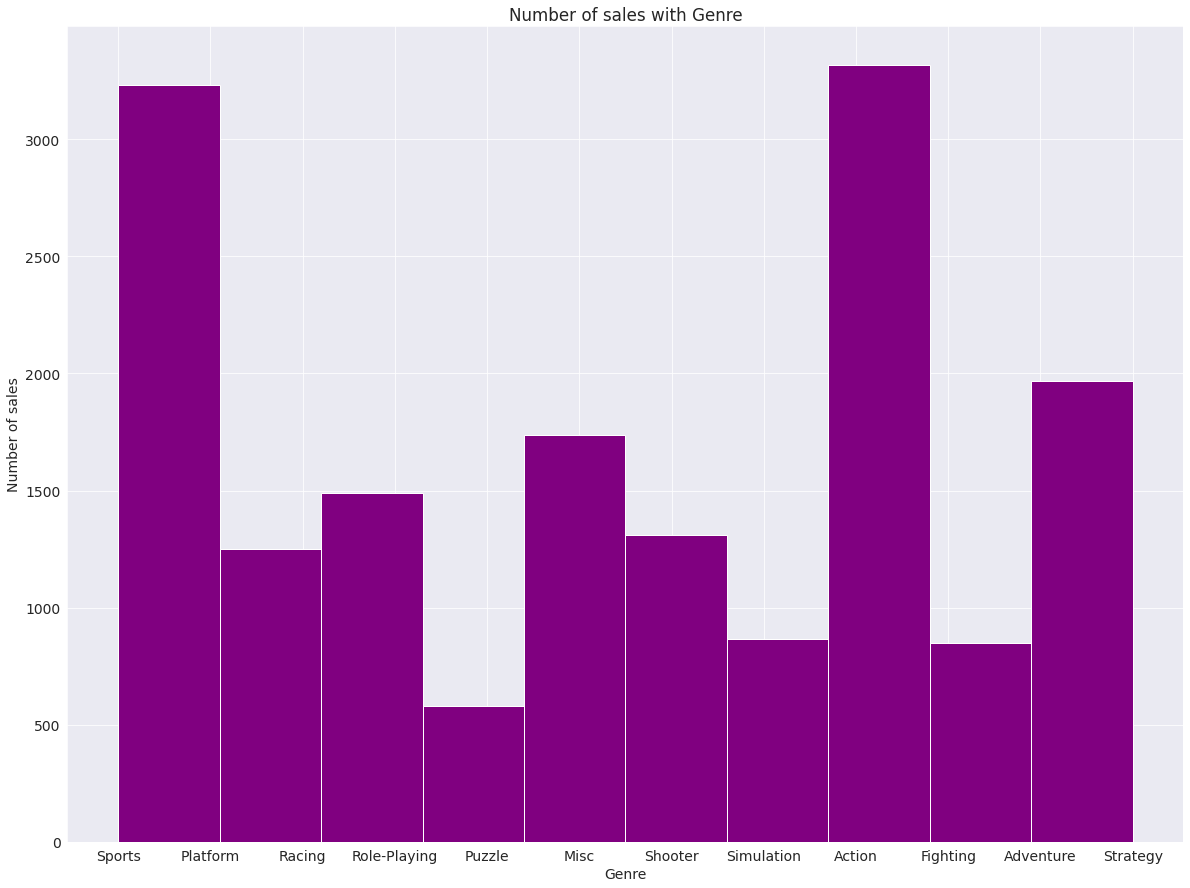

In [ ]:
plt.figure(figsize=(20,15))
plt.title("Number of sales with Genre")
plt.xlabel('Genre')
plt.ylabel('Number of sales')
plt.hist(vgs_df.Genre , color='purple');

Now, Here we have came with an histographic graph which is showing us the number of sales on Y-axis as on X-axis with it's genre of the video games which our dataset is containing, and from the histographic plotting we can visualize it clearly.

Here we'll plot the Genre with the number of Platform a genre contains.

In [ ]:
top_Platform = vgs_df.Platform.value_counts().head(10)
top_Platform

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: Platform, dtype: int64

Here we Have extracted the Top 10 Platforms of vedio games with the number of Vedio game a platform has.

In [ ]:
top_Genre = vgs_df.Genre.value_counts().head(10)
top_Genre

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: Genre, dtype: int64

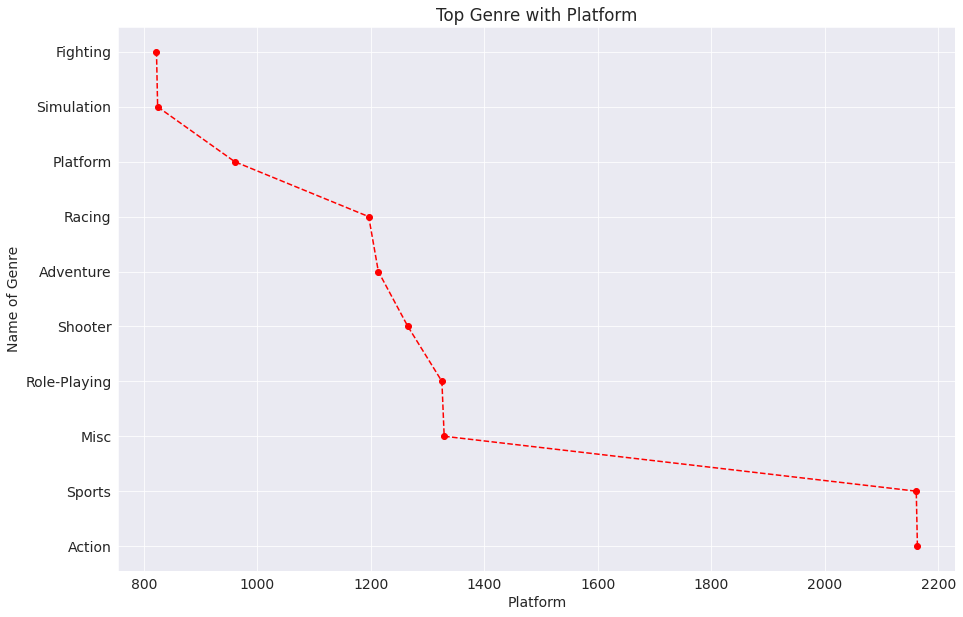

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Top Genre with Platform")
plt.xlabel('Platform')
plt.ylabel('Name of Genre')
plt.plot(top_Platform, top_Genre.index , marker='o', linestyle='--', color='r', label='Square')

Here we have come with another visualised graph of Video games.
X-axis is presenting the the number of platforms.
Y-axis is presenting the Genre name.
So, from the above the graph we are clearly getting that a particular genre of video game has that much number of platform on which the video games are being played.

Here we'll make a piechart of 10 Genres with the Percentage of Vedios games in specific Genre given in the dataset.

([<matplotlib.patches.Wedge at 0x7fb97f88a950>,
 [Text(0.8557934118298504, 0.6910988614291189, 'Action'),
  Text(-0.2917870248299123, 1.0605943296760116, 'Sports'),
  Text(-0.9829809148457139, 0.49370894365920037, 'Misc'),
  Text(-1.0790146647129275, -0.21383955044483424, 'Role-Playing'),
  Text(-0.7905777011355877, -0.7648443622510201, 'Shooter'),
  Text(-0.29352485398570277, -1.0601146919520887, 'Adventure'),
  Text(0.27131008554055996, -1.0660163401580551, 'Racing'),
  Text(0.6973044421292169, -0.8507446826086319, 'Platform'),
  Text(0.9518194140545185, -0.5513980440923899, 'Simulation'),
  Text(1.0834425282998181, -0.19013754987192327, 'Fighting')],
 [Text(0.4667964064526456, 0.3769630153249739, '21.6 %'),
  Text(-0.15915655899813397, 0.5785059980050972, '15.3 %'),
  Text(-0.5361714080976621, 0.2692957874504729, '11.3 %'),
  Text(-0.5885534534797786, -0.1166397547880914, '9.7 %'),
  Text(-0.4312242006194114, -0.41718783395510184, '8.5 %'),
  Text(-0.16010446581038332, -0.5782443774

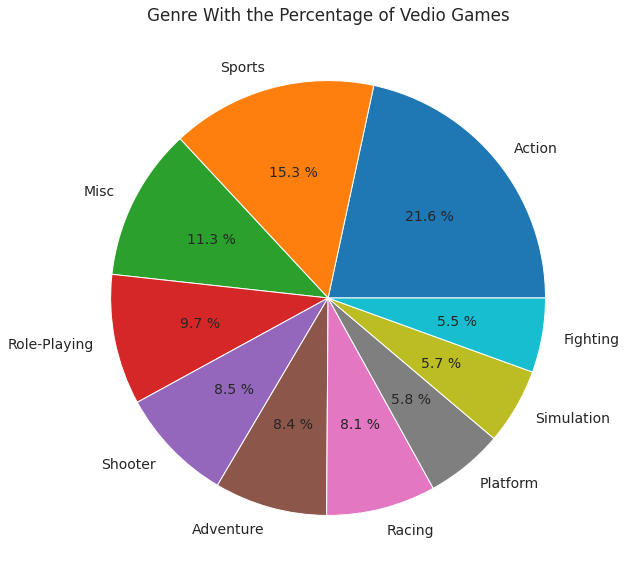

In [ ]:
plt.figure(figsize=(15,10))
plt.title ("Genre With the Percentage of Vedio Games")
plt.pie( top_Genre, labels = top_Genre.index, autopct = '%1.1f %%')


Now, here we have came with another interesting visualization as a pie chart, which will help us in better analysing of the datasets. 
hence the above pie chart is making us clear about the how much percentage of video games a specified Genre has.

Here we'll plot the Top 10 publisher and genre of vedio games.

In [ ]:
top_Publisher = vgs_df.Publisher.value_counts().head(10)
top_Publisher

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: Publisher, dtype: int64

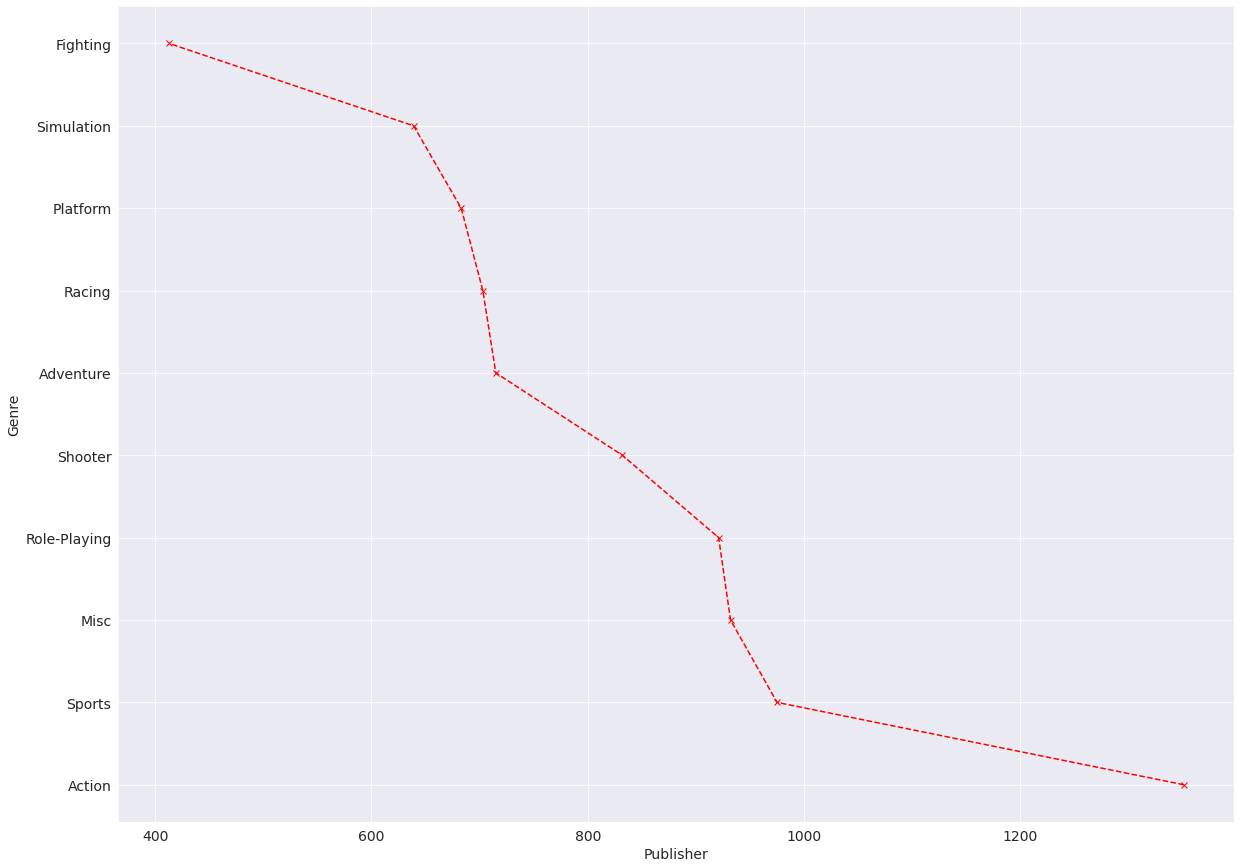

In [ ]:
plt.figure(figsize=(20,15))
plt.xlabel('Publisher')
plt.ylabel('Genre')
plt.plot(top_Publisher, top_Genre.index , marker='x',  linestyle='--', color='r', label='Square')


The above graph is making us clear about the Number of Publisher a genre has, as we have a large number of publishers so we have picked only top 10 publishers from the dataset. 
X-axis is showing the number of publishers while Y-axis is showing the Genre Name.
It is making us clear that the Genre Fighting has less number of publishers while the action genre has the highest number of publishers among the top 10 publishers of video games.


Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pandeyharshit268/vediogamesales


'https://jovian.ai/pandeyharshit268/vediogamesales'

Now, we have successfully saved our project to the jovian account using the command jovian.commit(project_name)


Here We will asks counter Question and answer them by implementing a code which extract the answer of the Question from the dataset. 



#### Q1: In Year = 2001 how many vedio games are sold and select 20 vedio games and show them in a graph ?

In [ ]:
d2 = vgs_df.query('Year == 2001')['Name']
d1 = d2.shape
print("In 2001 -  %d vedio games are sold." %(d1))


In 2001 -  482 vedio games are sold.


In [ ]:
d = d2.value_counts().head(20)
d

Madden NFL 2002                          5
Harry Potter and the Sorcerer's Stone    4
Dave Mirra Freestyle BMX 2               4
Tony Hawk's Pro Skater 3                 3
FIFA Soccer 2002                         3
Max Payne                                3
NHL Hitz 20-02                           3
The Simpsons: Road Rage                  3
Batman: Vengeance                        3
NASCAR Thunder 2002                      3
MX 2002 Featuring Ricky Carmichael       3
NBA Live 2002                            3
SSX Tricky                               3
Power Rangers: Time Force                2
Shaun Palmer's Pro Snowboarder           2
Army Men: Green Rogue                    2
Disney's Tarzan Untamed                  2
Driven                                   2
Disney's Atlantis: The Lost Empire       2
NFL GameDay 2002                         2
Name: Name, dtype: int64

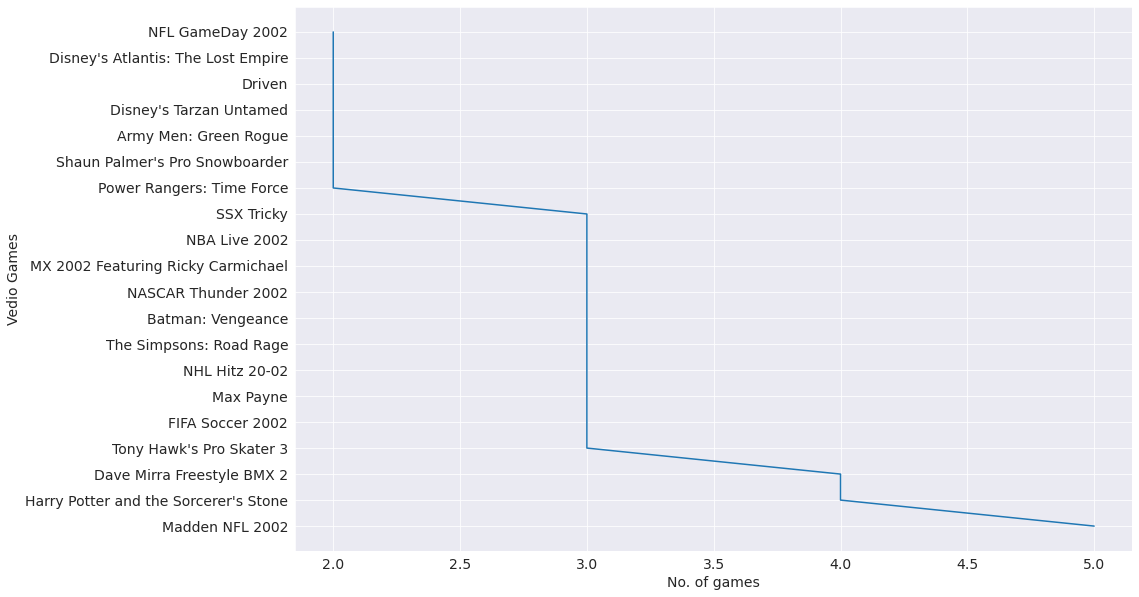

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('No. of games')
plt.ylabel('Vedio Games')
plt.plot(d , d.index)

The Above graph is answering our Q.1 as representing the visualization of the Videos games which were launched in the year 2001.
X-axis is showing Number of videos games sold and Y-axis is showing the video games which were sold in year 2001.

#### Q2: What are % of the Top 10 Global sales?

In [ ]:
g1 = vgs_df.Global_Sales.sort_values(ascending = False).head(10)
g1


0    82.74
1    40.24
2    35.82
3    33.00
4    31.37
5    30.26
6    30.01
7    29.02
8    28.62
9    28.31
Name: Global_Sales, dtype: float64

In [ ]:
print("The Top 10 Global Sales are - " ) 
g1

The Top 10 Global Sales are - 


0    82.74
1    40.24
2    35.82
3    33.00
4    31.37
5    30.26
6    30.01
7    29.02
8    28.62
9    28.31
Name: Global_Sales, dtype: float64

The above is the answer to the Q.2 which is clearing us about the Top most Global Sales of the Video Games which were sold.
Hence we are getting that the Top global sales is of 82.74 .

#### Q3: Which Genre has the highest number of games?

In [ ]:
h1 = vgs_df.groupby('Genre')['Name'].count().head(1)
h1

Genre
Action    3316
Name: Name, dtype: int64

In [ ]:
print("So, the highest number games is present in Genre :-")
h1

So, the highest number games is present in Genre :-


Genre
Action    3316
Name: Name, dtype: int64

Here, is the answer for the Q3. which is telling us the highest number of video games are in action Genre (3316).

#### Q4: What are the first 10 Vedio Games?

In [ ]:
h =vgs_df.groupby('Name')[['Year' , 'Global_Sales']].mean()
h

,Year,Global_Sales
Name,,
'98 Koshien,1998.0,0.410
.hack//G.U. Vol.1//Rebirth,2006.0,0.170
.hack//G.U. Vol.2//Reminisce,2006.0,0.230
.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,0.160
.hack//G.U. Vol.3//Redemption,2007.0,0.170
...,...,...
thinkSMART: Chess for Kids,2011.0,0.010
uDraw Studio,2010.0,2.460
uDraw Studio: Instant Artist,2011.0,0.105


In [ ]:
j= h.Year.sort_values()
j

Name
Bridge                                        1980.0
Freeway                                       1980.0
Kaboom!                                       1980.0
Checkers                                      1980.0
Reactor                                       1981.0
                                               ...  
Yu Yu Hakusho: Dark Tournament                   NaN
Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)       NaN
Zero: Tsukihami no Kamen                         NaN
eJay Clubworld                                   NaN
wwe Smackdown vs. Raw 2006                       NaN
Name: Year, Length: 11493, dtype: float64

In [ ]:
p = j.head(10)

print("The First 10 oldest Vedio games are :-")
p

The First 10 oldest Vedio games are :-


Name
Bridge                     1980.0
Freeway                    1980.0
Kaboom!                    1980.0
Checkers                   1980.0
Reactor                    1981.0
Raiders of the Lost Ark    1981.0
Front Line                 1981.0
Airlock                    1981.0
River Raid                 1981.0
Grand Prix                 1981.0
Name: Year, dtype: float64

Here, is the Explaination answer of Q4 : which is giving us the list of first 10 video games which are oldest among all the video games which is present in our dataset. The is as :

Bridge,                     
Freeway,                    
Kaboom!,                    
Checkers,                   
Reactor,                    
Raiders of the Lost Ark ,   
Front Line ,             
Airlock ,                   
River Raid ,                
Grand Prix .                


#### Q5: How is the role Publisher as per the increasing time?

Now, our dataset is too big. so we will select 100 row and analysis from here

In [ ]:
pl = vgs_df.head(100)

here we will use seaborn module to plot the scatter image for the data of publisher with comparision with year.

Text(0, 0.5, 'Publisher')

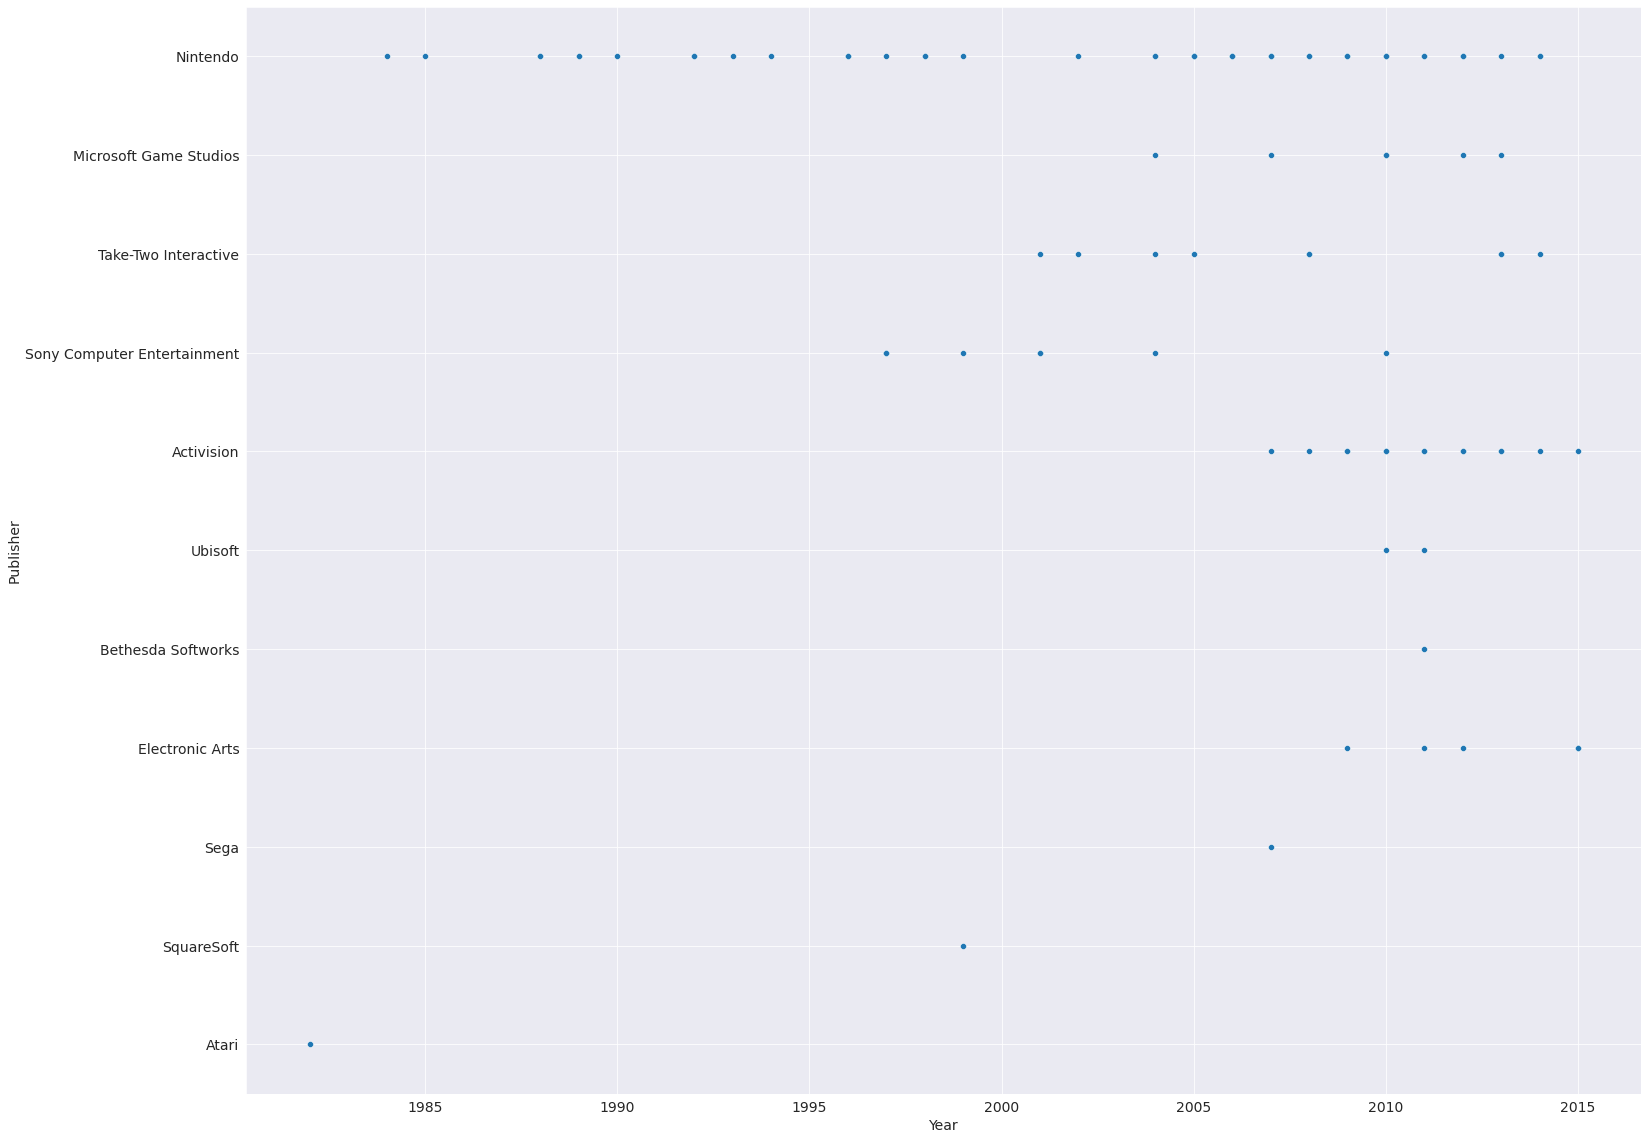

In [ ]:
plt.figure(figsize=(25,20))
sns.scatterplot(data=pl, x="Year", y="Publisher")
plt.xlabel("Year")
plt.ylabel("Publisher")

Now, here is explaination of Q5.
The above scatter graph will make us understand the role of publishers as per the increasing years which is making us clear that the publisher named nintendo is present in every decade of years.
Hence, it is making us clear that the publisher 'nintendo' is among the top publishers which publishes the video games per the trends of the present generations which is making his existence in the top among all the publishers.

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pandeyharshit268/vediogamesales


'https://jovian.ai/pandeyharshit268/vediogamesales'

Now, we have successfully saved our project to the jovian account using the command jovian.commit(project_name)

We have made my interesting inferences and conclusion from this dataset of Vedio games sale which are as follows:-

1. Majority of the vedio games are based on ACTION genre.
2. The global sales of vedios games was increasing as per the time.
3. The count of global sales is 16598.
4. Need for speed most wanted was highest populated among the other.
5. New platforms were also launched as per the increasing demands.

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pandeyharshit268/vediogamesales


'https://jovian.ai/pandeyharshit268/vediogamesales'

Now, we have successfully saved our project to the jovian account using the command jovian.commit(project_name)

As we have come to know that there was the drastic increase in global sales as per the time.
We have some more ideas for further analysis :    
1- Create some columns to know the sales as per different country.

2- We can create which genders buys games of which genre.

3- compare the sales with the publishers.




Reference : 
kaggle for downloading the dataset : https://www.kaggle.com/kedokedokedo/vgsales
Python Libraries such as pandas, Numpy, Os, Seaborn, matplotlib.pyplot. : https://www.python.org/doc/


In [ ]:
import jovian

Now, Here we have done with our data analysis of video games sales by differrent aspects.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pandeyharshit268/vediogamesales


'https://jovian.ai/pandeyharshit268/vediogamesales'